# Table Comparison of Methods on Surrogates
Produces a table similar to:
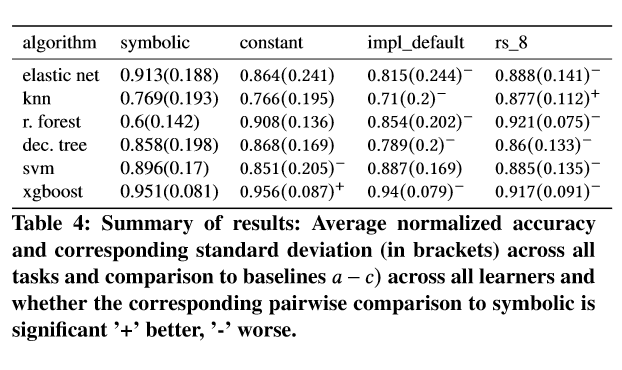

In [10]:
import pandas as pd

surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)
all_methods = pd.concat([surrogate_performance, opt_random_search])

In [11]:
def category_from_row(row):
    if '_' in row['optimizer']:
        return row['optimizer'].replace('_', ' ')
    elif row['optimizer'] == "mupluslambda":
        if row['constants']:
            return "constant default"
        else:
            return "symbolic default"
    else:
        raise ValueError(f"Unknown category for {row}")

all_methods["category"] = all_methods.apply(category_from_row, axis=1)

In [14]:
table = all_methods.groupby(["learner", "category"], as_index=False).surrogate_score.agg(["mean", "std"])
table = table.reset_index()
table4 = table.pivot(index="category", columns="learner", values=["mean", "std"])

In [15]:
table4.columns

MultiIndex([('mean',  'glmnet'),
            ('mean',     'knn'),
            ('mean',      'rf'),
            ('mean',   'rpart'),
            ('mean',     'svm'),
            ('mean', 'xgboost'),
            ( 'std',  'glmnet'),
            ( 'std',     'knn'),
            ( 'std',      'rf'),
            ( 'std',   'rpart'),
            ( 'std',     'svm'),
            ( 'std', 'xgboost')],
           names=[None, 'learner'])

In [26]:
import numpy as np

 numpy.nanmax(a, axis=None, out=None, keepdims=<no value>)[source]

In [31]:
table4

mean                                          \
learner                        glmnet       knn        rf     rpart       svm   
category                                                                        
constant default             0.927614  0.946707  0.951443  0.924564  0.859796   
mlr default                  0.857210  0.879096  0.933139  0.791849  0.879356   
optimistic random search 16  0.964093  0.997036  0.960901  0.952631  0.951976   
optimistic random search 2   0.545124  0.955206  0.886216  0.831177  0.771549   
optimistic random search 32  0.981476  0.998357  0.971528  0.966831  0.969675   
optimistic random search 4   0.771271  0.987288  0.923450  0.898294  0.871838   
optimistic random search 8   0.905976  0.994663  0.944572  0.931662  0.924970   
sklearn default                   NaN       NaN       NaN       NaN  0.881658   
symbolic default             0.917463  0.953558  0.946492  0.922480  0.888856   

                                            std                                \
learner                       xgboost    glmnet       knn        rf     rpart   
category                                                                        
constant default             0.994686  0.158471  0.156223  0.073841  0.092570   
mlr default                       NaN  0.153948  0.137486  0.084592  0.140749   
optimistic random search 16  0.987234  0.049553  0.004854  0.061525  0.063028   
optimistic random search 2   0.939927  0.121914  0.043446  0.116052  0.152555   
optimistic random search 32  0.992332  0.033752  0.002829  0.050170  0.048025   
optimistic random search 4   0.962819  0.107074  0.015515  0.092478  0.113178   
optimistic random search 8   0.978318  0.080186  0.008600  0.078485  0.082143   
sklearn default              0.925303       NaN       NaN       NaN       NaN   
symbolic default             0.995018  0.167918  0.147853  0.087446  0.111756   

                                                 
learner                           svm   xgboost  
category                                         
constant default             0.206665  0.011126  
mlr default                  0.189790       NaN  
optimistic random search 16  0.062548  0.027869  
optimistic random search 2   0.139715  0.100645  
optimistic random search 32  0.045061  0.016290  
optimistic random search 4   0.107131  0.066179  
optimistic random search 8   0.083949  0.042791  
sklearn default              0.189220  0.124540  
symbolic default             0.177885  0.010523

In [50]:
t = table4[[c for c in table4.columns if c[0] == 'mean']].transpose()
t["implementation default"] = [np.nanmax((v1, v2)) for v1, v2 in zip(t["sklearn default"], t["mlr default"])]
t4 = t[["symbolic default", "constant default", "implementation default", "optimistic random search 8"]].copy()
t4.index = [i for (v, i)in t4.index]
t4.columns.name='algorithm'
t4.rename(columns={
    "symbolic default": "symbolic",
    "constant default": "constant",
    "implementation default": "package",
    "optimistic random search 8": "opt. RS 8",
}, inplace=True)
t4


algorithm,symbolic,constant,package,opt. RS 8
glmnet,0.917463,0.927614,0.857210,0.905976
knn,0.953558,0.946707,0.879096,0.994663
rf,0.946492,0.951443,0.933139,0.944572
rpart,0.922480,0.924564,0.791849,0.931662
svm,0.888856,0.859796,0.881658,0.924970
xgboost,0.995018,0.994686,0.925303,0.978318


In [51]:
print(t4.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrr}
\toprule
algorithm &  symbolic &  constant &  package &  opt. RS 8 \\
\midrule
glmnet  &     0.917 &     0.928 &    0.857 &      0.906 \\
knn     &     0.954 &     0.947 &    0.879 &      0.995 \\
rf      &     0.946 &     0.951 &    0.933 &      0.945 \\
rpart   &     0.922 &     0.925 &    0.792 &      0.932 \\
svm     &     0.889 &     0.860 &    0.882 &      0.925 \\
xgboost &     0.995 &     0.995 &    0.925 &      0.978 \\
\bottomrule
\end{tabular}



In [52]:
t = table4[[c for c in table4.columns if c[0] == 'std']].transpose()
t["implementation default"] = [np.nanmax((v1, v2)) for v1, v2 in zip(t["sklearn default"], t["mlr default"])]
t4 = t[["symbolic default", "constant default", "implementation default", "optimistic random search 8"]].copy()
t4.index = [i for (v, i)in t4.index]
t4.columns.name='algorithm'
t4.rename(columns={
    "symbolic default": "symbolic",
    "constant default": "constant",
    "implementation default": "package",
    "optimistic random search 8": "opt. RS 8",
}, inplace=True)
t4

algorithm,symbolic,constant,package,opt. RS 8
glmnet,0.167918,0.158471,0.153948,0.080186
knn,0.147853,0.156223,0.137486,0.008600
rf,0.087446,0.073841,0.084592,0.078485
rpart,0.111756,0.092570,0.140749,0.082143
svm,0.177885,0.206665,0.189790,0.083949
xgboost,0.010523,0.011126,0.124540,0.042791


In [53]:
print(t4.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrr}
\toprule
algorithm &  symbolic &  constant &  package &  opt. RS 8 \\
\midrule
glmnet  &     0.168 &     0.158 &    0.154 &      0.080 \\
knn     &     0.148 &     0.156 &    0.137 &      0.009 \\
rf      &     0.087 &     0.074 &    0.085 &      0.078 \\
rpart   &     0.112 &     0.093 &    0.141 &      0.082 \\
svm     &     0.178 &     0.207 &    0.190 &      0.084 \\
xgboost &     0.011 &     0.011 &    0.125 &      0.043 \\
\bottomrule
\end{tabular}

